In [27]:
import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
import QuantLib as ql
os.getcwd()

'E:\\backtrader\\CSMAR\\Price-20180927-20230926'

In [17]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "CSMAR", 'Price-20180927-20230926'))
cwd = os.getcwd()
combined_df = pd.DataFrame()
for filename in os.listdir(cwd):
    if filename.endswith(".csv"):
        file_path = os.path.join(cwd, filename)
        # 逐个导入CSV文件并追加到combined_df
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
df = combined_df
df.head(5)

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Ahshrtrd_D
0,1,2018-09-27,10.65,10.84,10.57,10.74,88036333,9.422004e+08,1.844085e+08,1.844102e+08,NaN
1,1,2018-09-28,10.78,11.27,10.78,11.05,211024267,2.331358e+09,1.897312e+08,1.897330e+08,NaN
2,1,2018-10-08,10.70,10.79,10.45,10.45,168635852,1.793455e+09,1.794291e+08,1.794308e+08,NaN
3,1,2018-10-09,10.46,10.70,10.39,10.56,106408426,1.117947e+09,1.813178e+08,1.813195e+08,NaN
4,1,2018-10-10,10.54,10.66,10.38,10.45,99520008,1.045666e+09,1.794291e+08,1.794308e+08,NaN


In [18]:
df['Trddt'] = pd.to_datetime(df['Trddt'])
type = pd.DataFrame([df[f'{_}'].dtype for _ in df.columns])
type

,0
0,int64
1,datetime64[ns]
2,float64
3,float64
4,float64
5,float64
6,int64
7,float64
8,float64
9,float64


In [19]:
df = df.sort_values(by='Trddt')
df['dpr'] = df.groupby('Stkcd')['Clsprc'].pct_change()

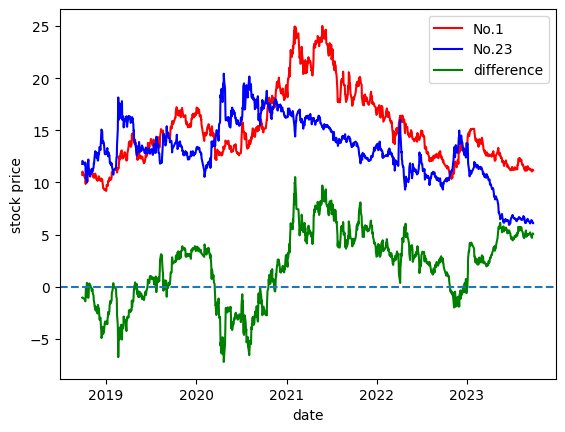

In [20]:
sample = pd.merge(df[df['Stkcd'] == 1], df[df['Stkcd'] == 23], on='Trddt', how='inner')
sample['difference'] = sample['Clsprc_x'] - sample['Clsprc_y']
plt.plot(sample['Trddt'], sample['Clsprc_x'], color='r', label='No.1')
plt.plot(sample['Trddt'], sample['Clsprc_y'], color='b', label='No.23')
plt.plot(sample['Trddt'], sample['difference'], color='g', label='difference')
plt.axhline(y=0, linestyle='--')
plt.xlabel('date')
plt.ylabel('stock price')
plt.legend()
plt.show()

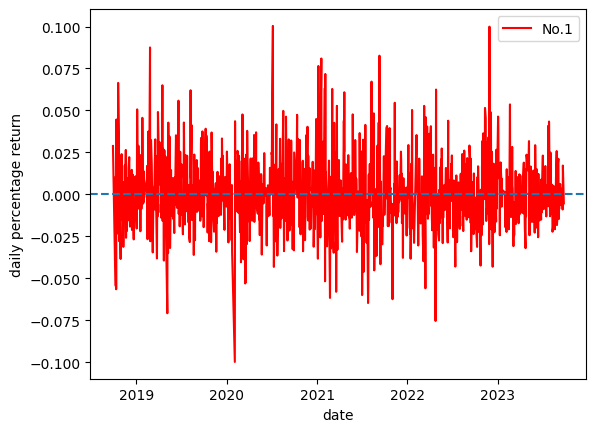

count    1213.000000
mean       15.113223
std         3.518358
min         9.190000
25%        12.560000
50%        14.370000
75%        17.150000
max        25.010000
Name: Clsprc_x, dtype: float64

In [26]:
plt.plot(sample['Trddt'], sample['dpr_x'], color='r', label='No.1')
# plt.plot(sample['Trddt'], sample['dpr_x'], color='b', label='No.23')
plt.axhline(y=0, linestyle='--')
plt.xlabel('date')
plt.ylabel('daily percentage return')
plt.legend()
plt.show()
sample['Clsprc_x'].describe()

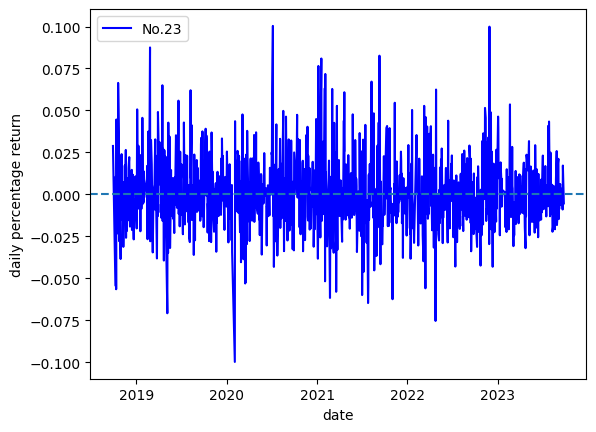

count    1213.000000
mean       13.123718
std         3.026901
min         5.940000
25%        11.360000
50%        13.130000
75%        15.520000
max        20.430000
Name: Clsprc_y, dtype: float64

In [25]:
# plt.plot(sample['Trddt'], sample['dpr_x'], color='r', label='No.1')
plt.plot(sample['Trddt'], sample['dpr_x'], color='b', label='No.23')
plt.axhline(y=0, linestyle='--')
plt.xlabel('date')
plt.ylabel('daily percentage return')
plt.legend()
plt.show()
sample['Clsprc_y'].describe()

In [ ]:
sample['dpr_x'].head(5)